Downloading Data form Kaggle:

In [1]:
!pip install kaggle 
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!kaggle datasets download -d navoneel/brain-mri-images-for-brain-tumor-detection

 33% 5.00M/15.1M [00:00<00:00, 19.5MB/s]
100% 15.1M/15.1M [00:00<00:00, 43.2MB/s]


In [ ]:
!unzip '/content/brain-mri-images-for-brain-tumor-detection.zip'

**Installing Dependencies:**

In [4]:
import numpy as np
import tensorflow as tf
import os
import cv2
import random
from matplotlib import pyplot as plt

In [6]:
dataset_path=r'/content/brain_tumor_dataset'
categories=['no','yes']

**Image Preprocessing:**

In [48]:
img_size=100
data=[]

for category in categories:
  folder=os.path.join(dataset_path,category)
  label=categories.index(category)
  for img in os.listdir(folder):
        img_path=os.path.join(folder,img)
        img_arr=cv2.imread(img_path)
        img_arr=cv2.resize(img_arr,(img_size, img_size))
        gray=cv2.cvtColor(img_arr,cv2.COLOR_BGR2GRAY)
        data.append([gray, label])

random.shuffle(data)        
len(data) 

253

In [49]:
x=[]
y=[]

for i,j in data:
  x.append(i)
  y.append(j)

In [50]:
x=np.array(x)
x=x/255
print(x)

[[[0.00392157 0.01568627 0.01960784 ... 0.02352941 0.         0.        ]
  [0.01568627 0.01568627 0.01568627 ... 0.01568627 0.         0.        ]
  [0.01960784 0.01960784 0.03921569 ... 0.01960784 0.         0.        ]
  ...
  [0.01176471 0.01960784 0.01960784 ... 0.01568627 0.         0.        ]
  [0.00392157 0.02352941 0.01176471 ... 0.00784314 0.         0.        ]
  [0.02745098 0.01960784 0.02352941 ... 0.02352941 0.         0.        ]]

 [[0.00392157 0.00392157 0.00392157 ... 0.00392157 0.00392157 0.00392157]
  [0.00392157 0.00392157 0.00392157 ... 0.00392157 0.00392157 0.00392157]
  [0.00392157 0.00392157 0.00392157 ... 0.00392157 0.00392157 0.00392157]
  ...
  [0.00392157 0.00392157 0.00392157 ... 0.00392157 0.00392157 0.00392157]
  [0.00392157 0.00392157 0.00392157 ... 0.00392157 0.00392157 0.00392157]
  [0.00392157 0.00392157 0.00392157 ... 0.00392157 0.00392157 0.00392157]]

 [[0.         0.         0.         ... 0.         0.         0.        ]
  [0.         0.      

In [51]:
x.shape

(253, 100, 100)

In [61]:
x= np.asarray(x).astype('float32').reshape((253,100,100,1))
x.shape

(253, 100, 100, 1)

In [30]:
y=np.array(y)
y= np.asarray(y).astype('float32').reshape((-1,1))
y.shape

(253, 1)

In [70]:
x=np.array(x)
y=np.array(y)

**Data Visualization:**

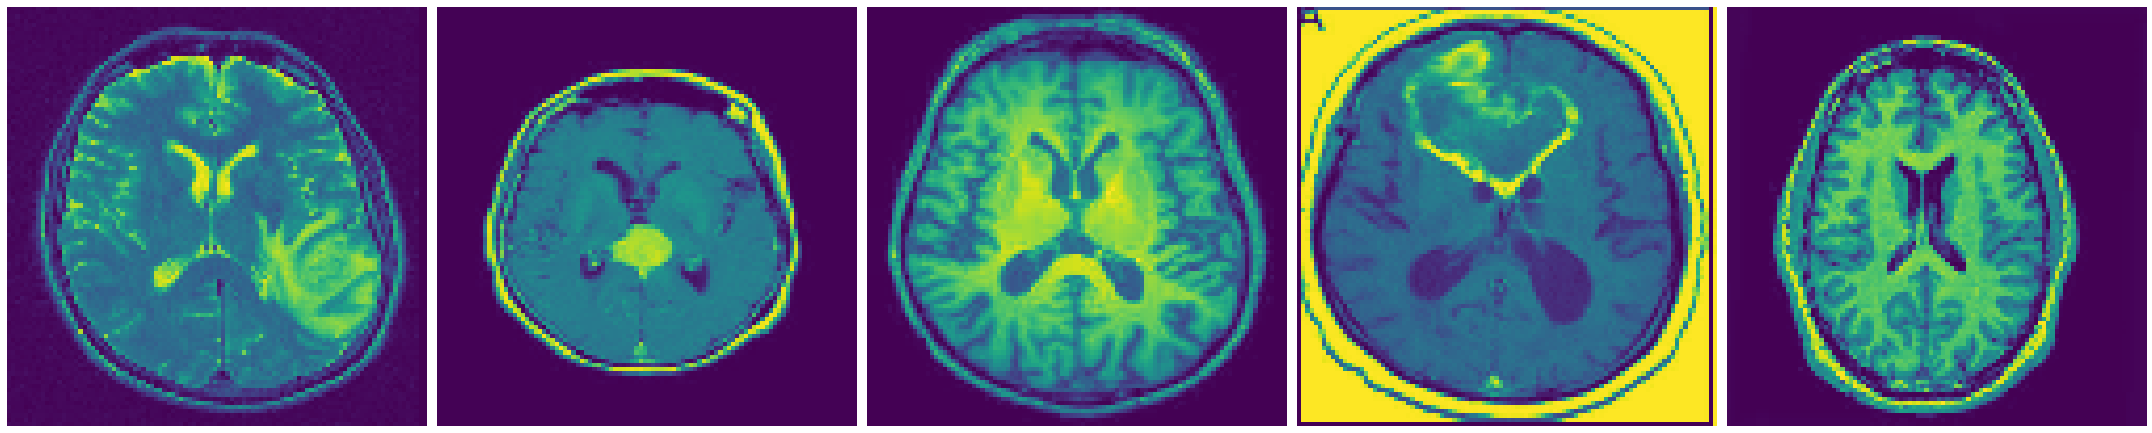

1
0
1
0
1


In [56]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(30,30))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

plotImages(x[:,:,:,0])

for i in range(1,6):
  print(y[i])

**Model Building:**

In [72]:
model=tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(100,100,1)))
model.add(tf.keras.layers.MaxPooling2D())
model.add(tf.keras.layers.Conv2D(32,(3,3),activation='relu'))
model.add(tf.keras.layers.MaxPooling2D())
model.add(tf.keras.layers.Conv2D(16,(3,3),activation='relu'))
model.add(tf.keras.layers.MaxPooling2D())
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(1600,activation='relu'))
model.add(tf.keras.layers.Dense(800,activation='relu'))
model.add(tf.keras.layers.Dense(200,activation='relu'))
model.add(tf.keras.layers.Dense(20,activation='relu'))
model.add(tf.keras.layers.Dense(2,activation='Softmax'))

model.build(x.shape)
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 98, 98, 16)        160       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 49, 49, 16)       0         
 2D)                                                             
                                                                 
 conv2d_12 (Conv2D)          (None, 47, 47, 32)        4640      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 23, 23, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 21, 21, 16)        4624      
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 10, 10, 16)      

**Compiling & Training the model:**

In [73]:
model.compile(loss=tf.keras.losses.sparse_categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])

hist=model.fit(x,y,epochs=20,verbose=1,validation_split=0.1)

Epoch 1/20
8/8 [==============================] - 3s 263ms/step - loss: 0.6474 - accuracy: 0.6256 - val_loss: 0.6256 - val_accuracy: 0.6923
Epoch 2/20
8/8 [==============================] - 2s 236ms/step - loss: 0.5782 - accuracy: 0.7093 - val_loss: 0.4444 - val_accuracy: 0.8077
Epoch 3/20
8/8 [==============================] - 2s 232ms/step - loss: 0.5054 - accuracy: 0.7665 - val_loss: 0.3551 - val_accuracy: 0.8846
Epoch 4/20
8/8 [==============================] - 2s 233ms/step - loss: 0.4536 - accuracy: 0.7974 - val_loss: 0.4924 - val_accuracy: 0.7692
Epoch 5/20
8/8 [==============================] - 3s 341ms/step - loss: 0.5130 - accuracy: 0.7577 - val_loss: 0.3798 - val_accuracy: 0.8846
Epoch 6/20
8/8 [==============================] - 2s 261ms/step - loss: 0.4074 - accuracy: 0.8150 - val_loss: 0.3473 - val_accuracy: 0.8846
Epoch 7/20
8/8 [==============================] - 2s 230ms/step - loss: 0.3312 - accuracy: 0.8767 - val_loss: 0.7325 - val_accuracy: 0.6923
Epoch 8/20
8/8 [====

**Evaluating the Model:**

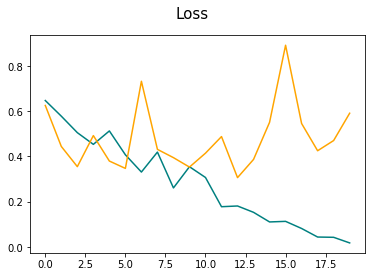

In [74]:
fig=plt.figure()
plt.plot(hist.history['loss'],color='teal', label='loss')
plt.plot(hist.history['val_loss'],color='orange', label='loss')
fig.suptitle('Loss', fontsize=15)
plt.show()

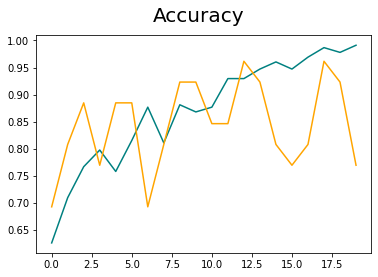

In [76]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.show()